<a href="https://colab.research.google.com/github/Nishtha1994/AI4Good/blob/feature%2FCollect-AirPollution-Datasets/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Air Quality

In [21]:
# Import packages
import pandas as pd # package for reading in and manipulating data
from datetime import datetime # package for manipulating dates

import utils # utils functions defined for this lab
import matplotlib.pyplot as plt

print('All packages imported successfully!')

All packages imported successfully!


In [2]:
!pip3 install utils

In [13]:
# Read in the data
raw_data = pd.read_csv('/data.csv',encoding="ISO-8859-1")

# Modify the DateTime column format
# raw_data['DateTime'] = pd.to_datetime(utils.fix_dates(raw_data, 'DateTime'), dayfirst=True)
# # Rename "OZONO" column from Spanish to English
raw_data = raw_data.rename(columns={'PM2_5': 'PM2.5'})

# # List all of the pollutants that you will be working with
# pollutants_list = ['PM2.5', 'PM10',  'NO', 'NO2', 'NOX', 'CO', 'OZONE']

# # Print out the number of lines in the dataframe
# print(f"The dataset contains {len(raw_data)} entries")

# # Print out the first few lines in the dataframe
print(f"The dataset contains {len(raw_data)} entries")
raw_data.head(5)

<ipython-input-13-b959e685e241>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('/data.csv',encoding="ISO-8859-1")


The dataset contains 435742 entries


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [46]:
raw_data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [16]:
number_of_bins=64

In [55]:
selected_columns = raw_data[["state","location", "so2", "no2","rspm","spm","pm2_5"]]
selected_columns = selected_columns[selected_columns["location"]=='Delhi']

In [56]:
print(f"The dataset contains {len(selected_columns)} entries")

The dataset contains 8551 entries


In [20]:
!pip3 install pandas matplotlib

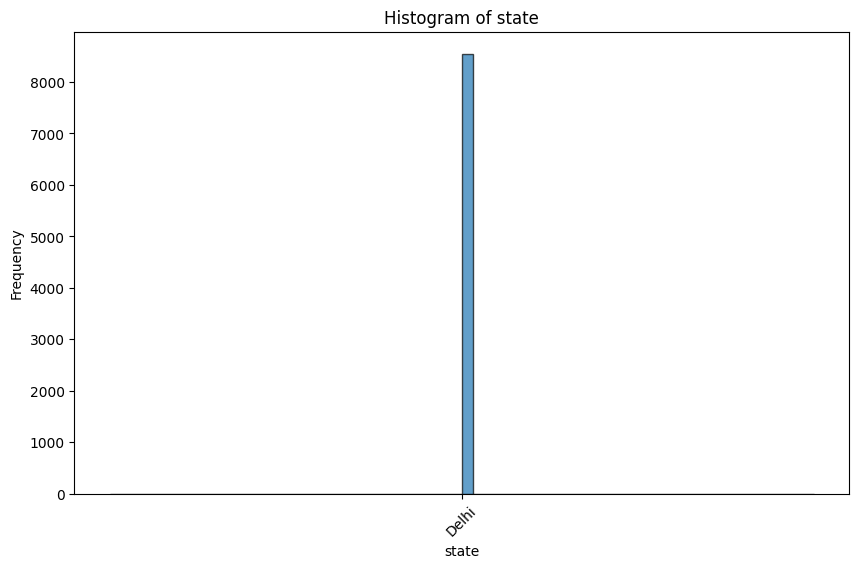

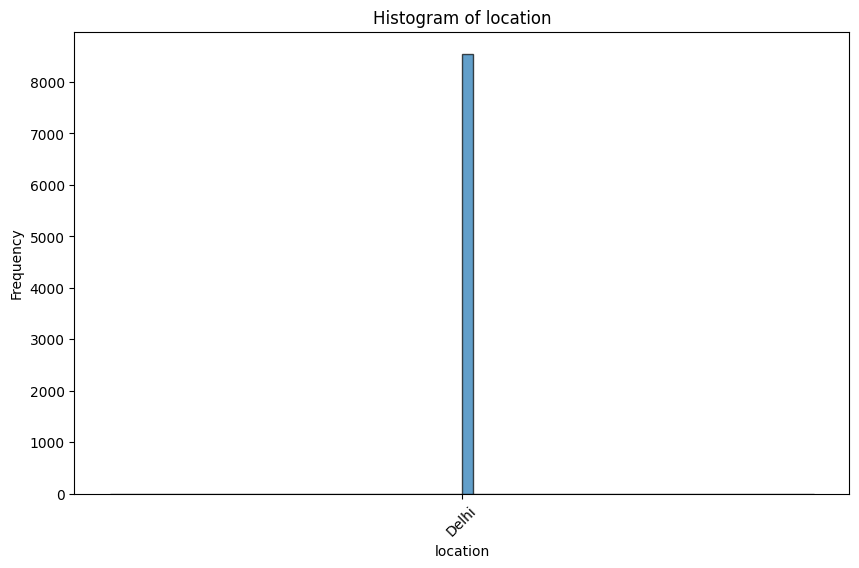

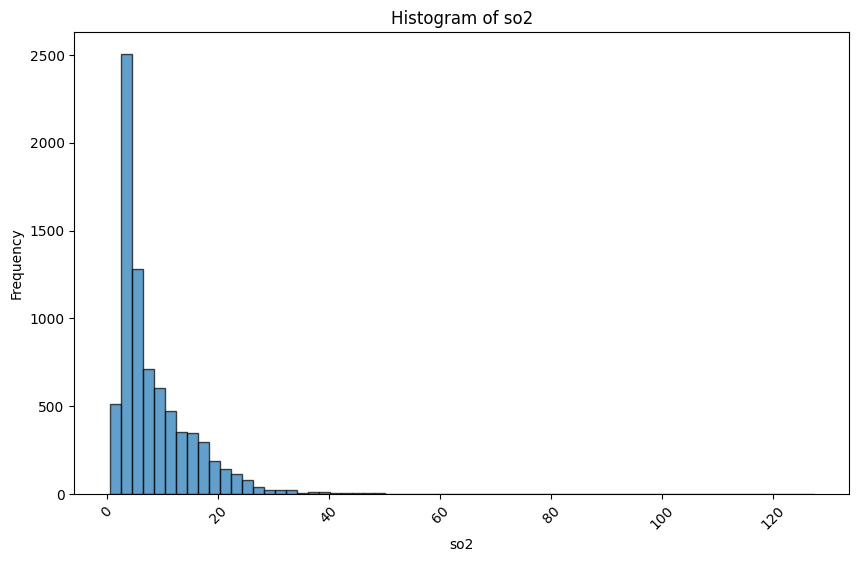

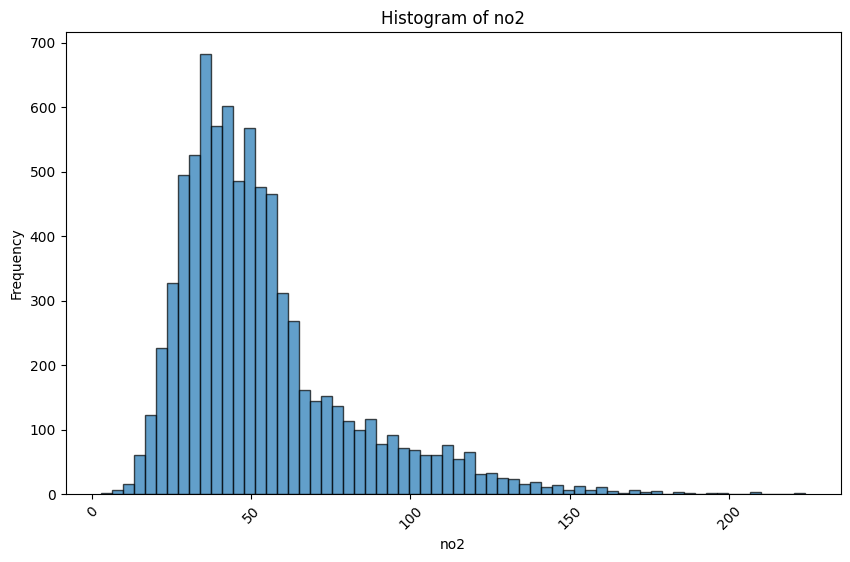

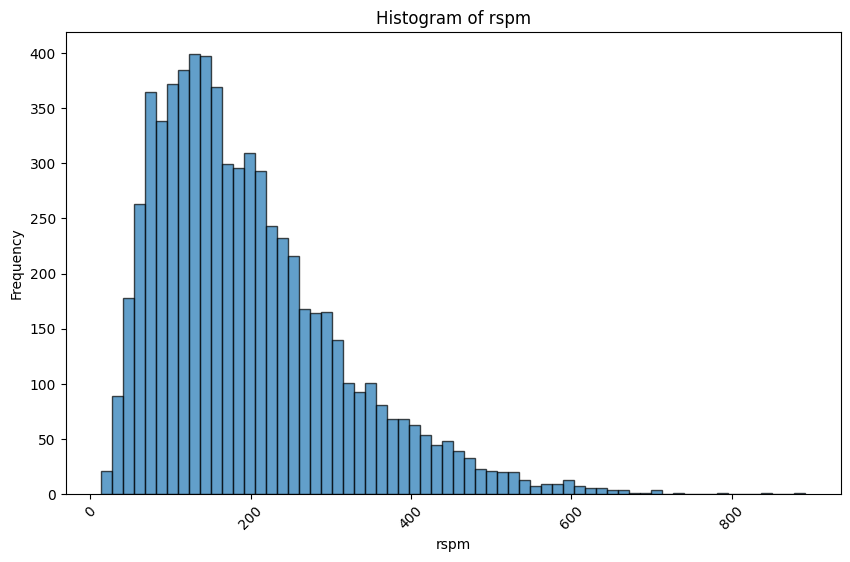

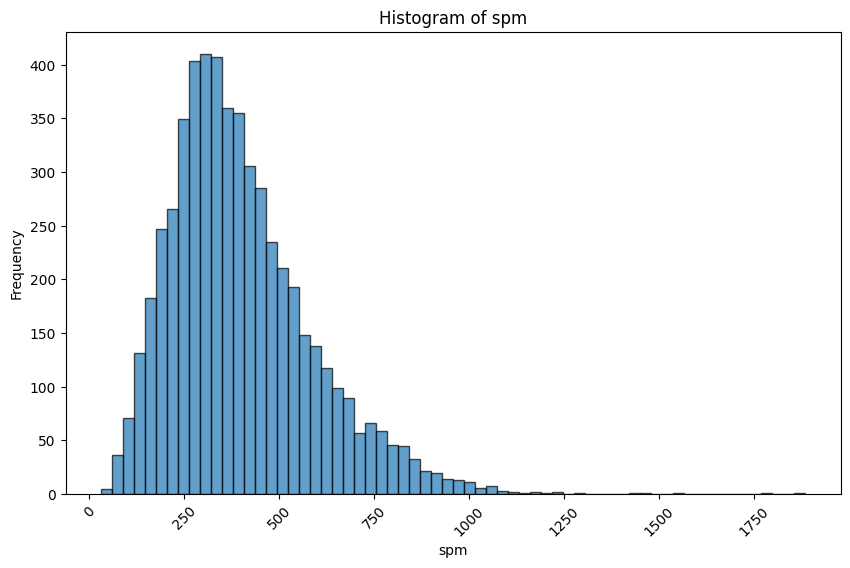

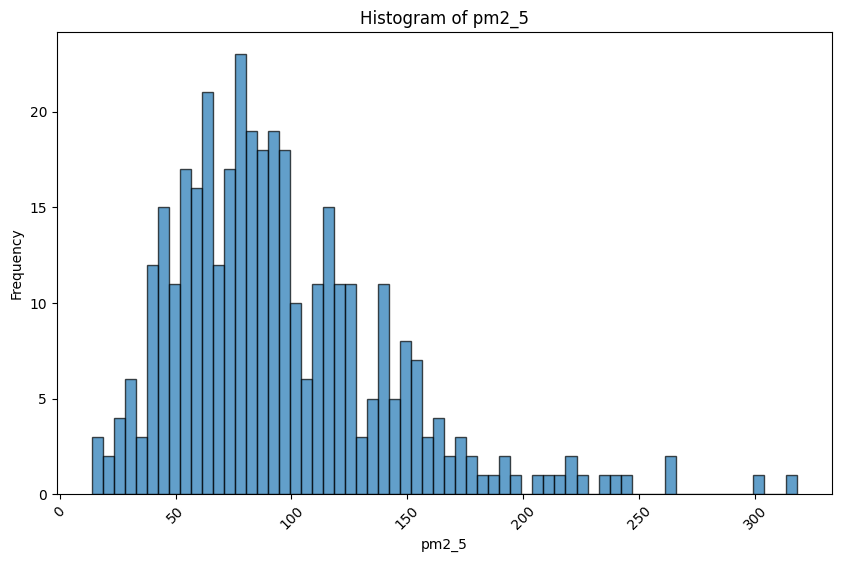

In [57]:
for col in selected_columns:
    plt.figure(figsize=(10,6))
    selected_columns[col].hist(bins=number_of_bins, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [48]:
import seaborn as sns
import ipywidgets as widgets

In [59]:
df_melted = selected_columns.melt(id_vars=['location'], value_vars=['no2', 'so2', 'pm2_5','rspm','spm'],
                    var_name='pollutant_type', value_name='level')

In [60]:
def plot_data(pollutant):
    plt.figure(figsize=(10,6))
    sns.boxplot(x='location', y=pollutant, data=selected_columns)
    plt.title(f'Levels of {pollutant} by location')
    plt.ylabel('Level')
    plt.xlabel('location')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

pollutants = ['no2', 'so2', 'pm2_5','rspm','spm']
widgets.interactive(plot_data, pollutant=pollutants)
# plot_data('so2')

interactive(children=(Dropdown(description='pollutant', options=('no2', 'so2', 'pm2_5', 'rspm', 'spm'), value=…

In [61]:
def plot_data(x_pollutant, y_pollutant):
    plt.figure(figsize=(10,6))

    # Using scatterplot
    sns.scatterplot(x=selected_columns[x_pollutant], y=selected_columns[y_pollutant], s=100)

    plt.title(f'Scatter plot of {x_pollutant} vs {y_pollutant}')
    plt.ylabel(y_pollutant)
    plt.xlabel(x_pollutant)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create a dropdown with pollutants and display the interactive plot
pollutants = ['no2', 'so2', 'pm2_5','rspm','spm']
widgets.interactive(plot_data, x_pollutant=pollutants, y_pollutant=pollutants)






interactive(children=(Dropdown(description='x_pollutant', options=('no2', 'so2', 'pm2_5', 'rspm', 'spm'), valu…

<ipython-input-63-03ad519493ff>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


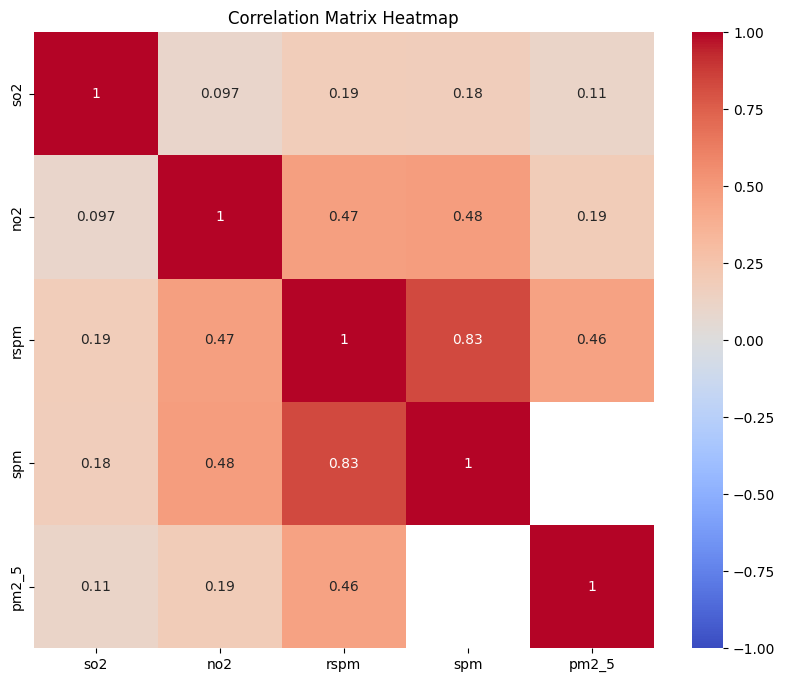

In [63]:
df = selected_columns.drop('location', axis=1)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()